# Medical_Insurance_Cost_Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from scipy import stats
%matplotlib inline
sns.set(style = "darkgrid", font_scale = 1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_excel("Worksheet in Medical Insurance cost prediction Supervised Machine Learning.xlsm")

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1054,27,female,21.470,0,no,northwest,3353.47030
139,22,female,36.000,0,no,southwest,2166.73200
308,58,male,34.865,0,no,northeast,11944.59435
875,23,female,28.120,0,no,northwest,2690.11380
248,19,male,20.900,1,no,southwest,1832.09400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.describe(include = ["object"]).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [10]:
df.duplicated().sum()

1

# 2. Exploratory Data Analysis (EDA)

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
numerical_data = df.select_dtypes(include = [np.number])
numerical_data.head(5)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [13]:
categorical_data = df.select_dtypes(include = "object")
categorical_data.head(5)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


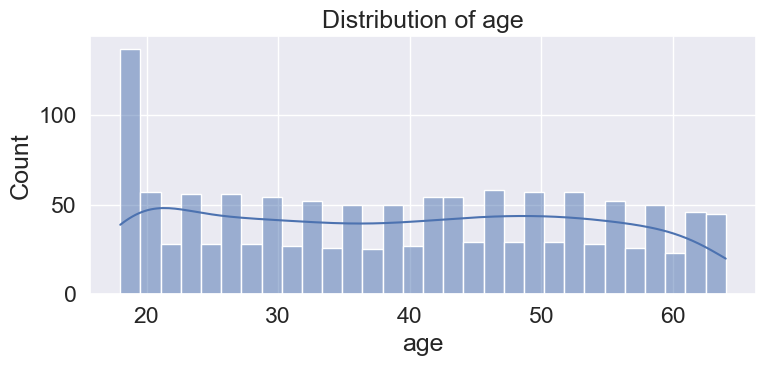

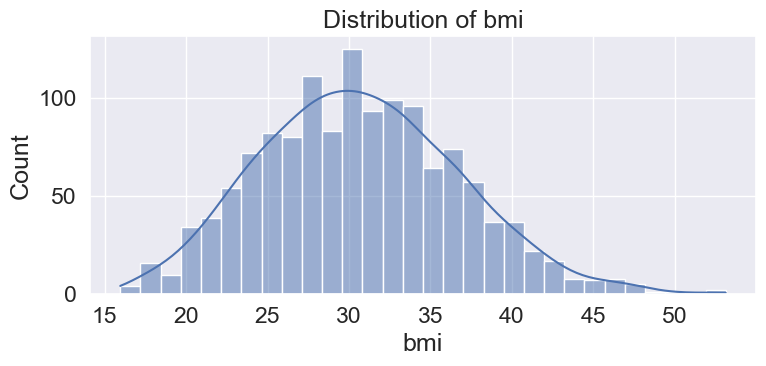

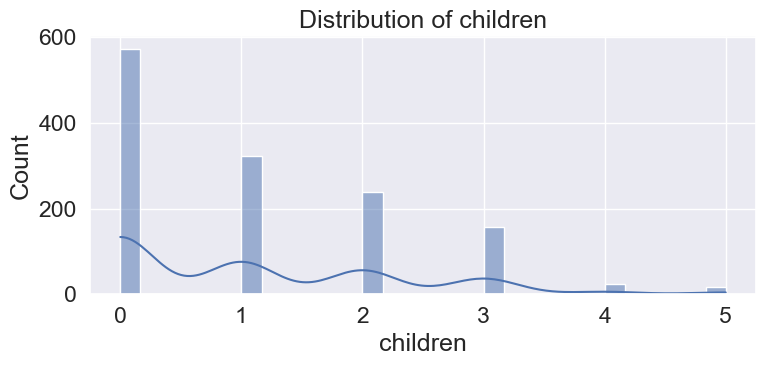

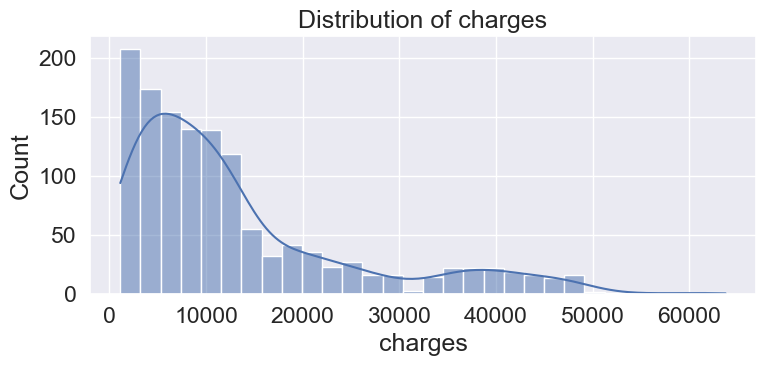

In [14]:
numeric_features = ['age', 'bmi', 'children', 'charges']

for feature in numeric_features:
    plt.figure(figsize = (8,4))
    sns.histplot(df[feature], kde = True, bins = 30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

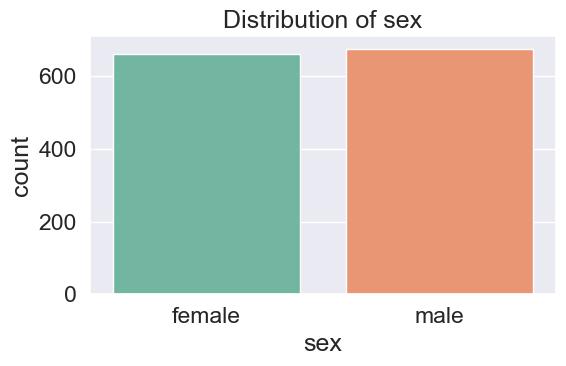

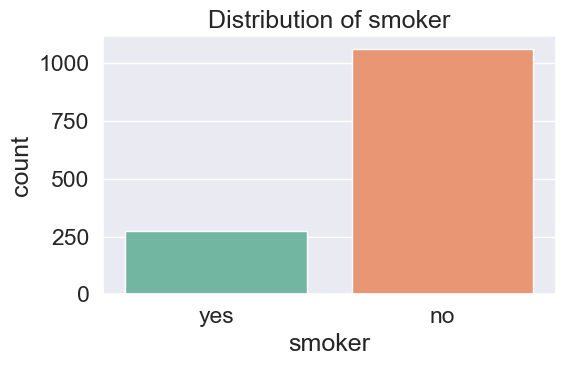

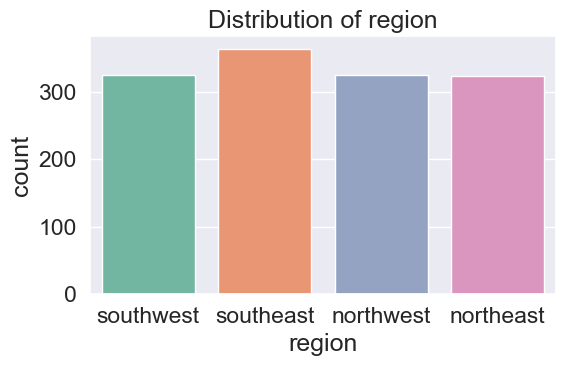

In [15]:
categorical_features = ["sex","smoker","region"]

for feature in categorical_features:
    plt.figure(figsize = (6,4))
    sns.countplot(data = df, x = feature, palette = "Set2")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

In [16]:
numerical_data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [17]:
df_encoded = pd.get_dummies(df, drop_first = True) #This will encode only the categorical variables, numerical variables will be untouched

In [18]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [19]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


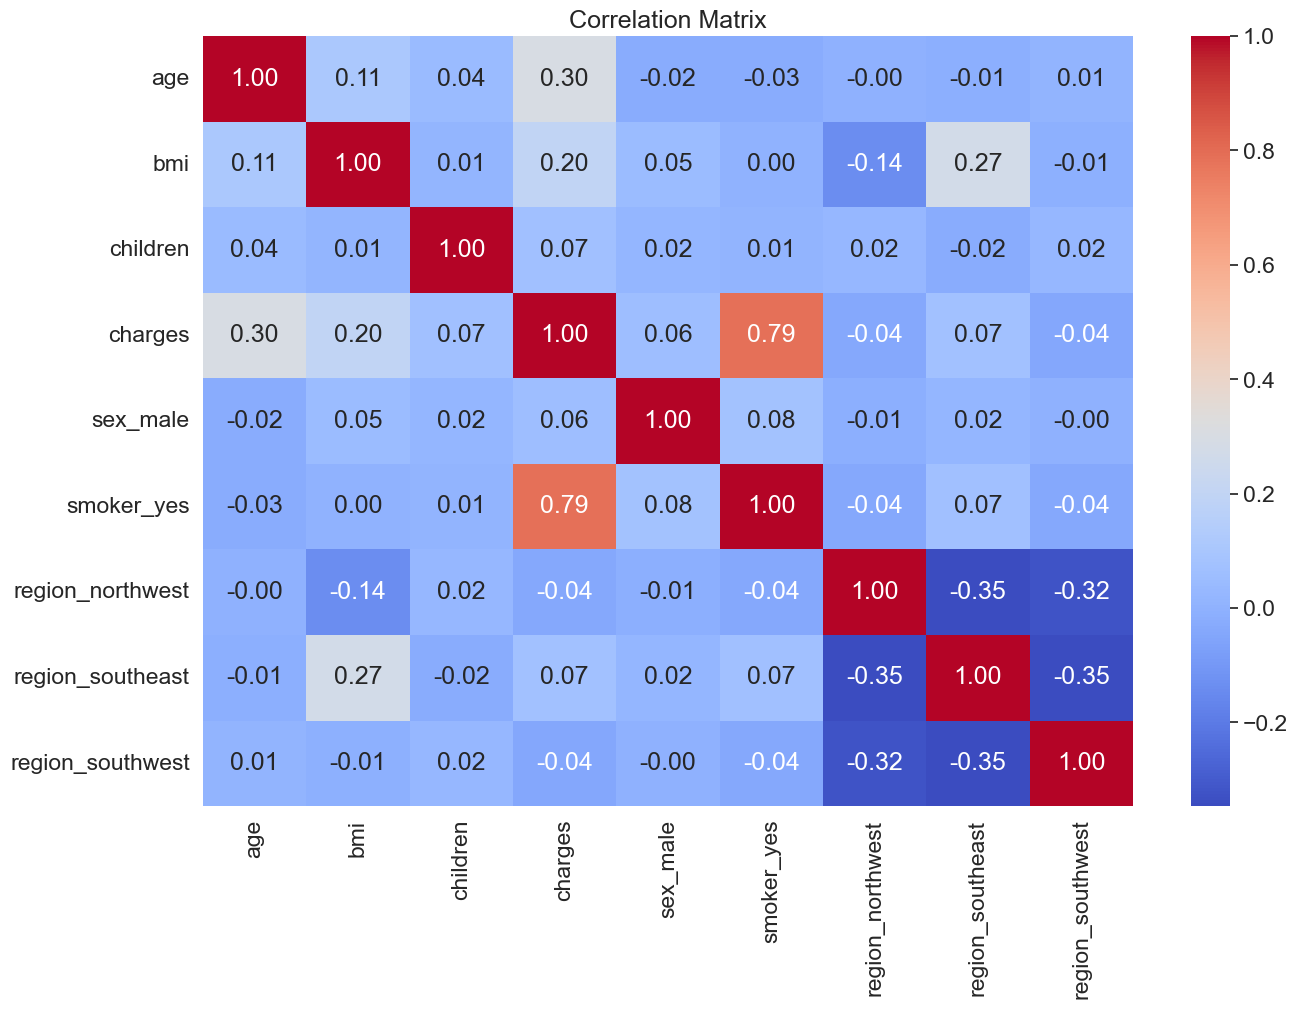

In [20]:
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

### Charges and smoker has a very high corelation
### Charge and age is very slightly corelated

## 3. Missing Values & Outlier Treatment

In [21]:
df.isnull().sum().to_frame().rename(columns = {0: "Total No. of Missing Values"})

,Total No. of Missing Values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


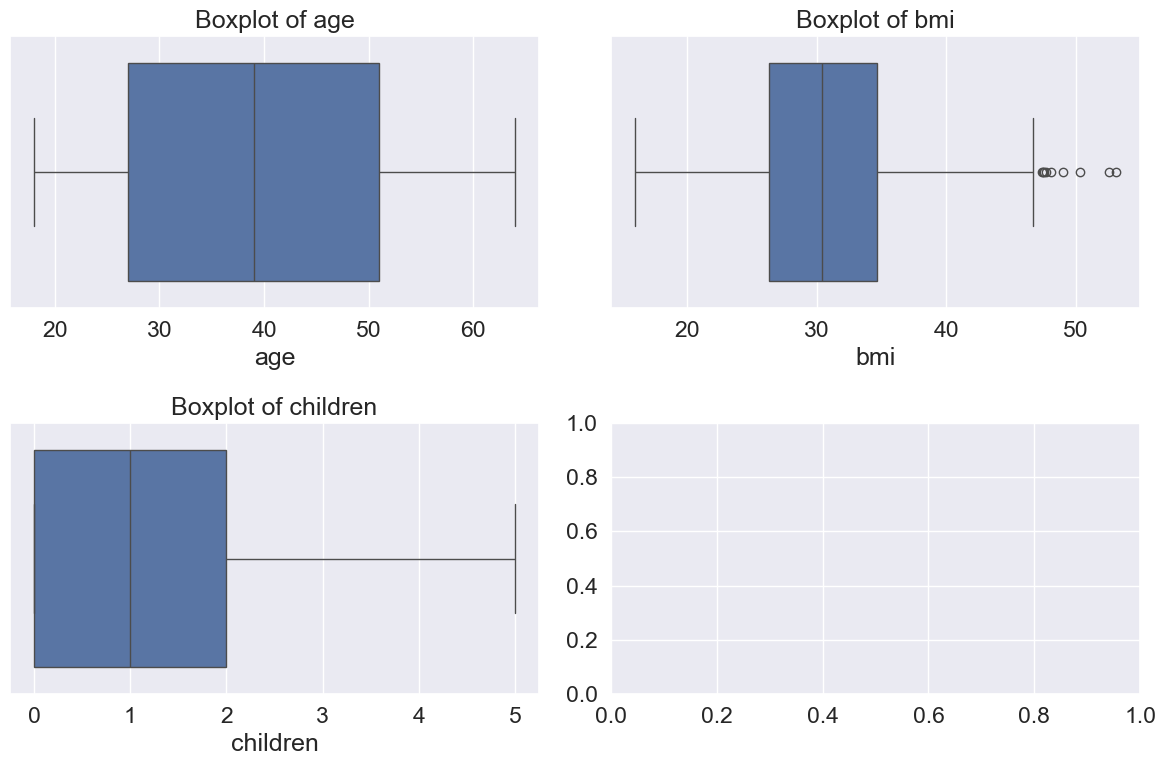

In [22]:
numerical_cols = df.select_dtypes(include='number').drop(columns=['charges']).columns

fig, axes = plt.subplots(2,2, figsize = (12,8))
axes = axes.flatten()

for i,col in enumerate(numerical_cols):
    sns.boxplot(data = df, x = col, ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Checking how many outliers are there in each columns/independent variable

In [23]:
def detect_outlier_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
    
# Apply the function to each numeric column
for col in numerical_cols:
    outliers = detect_outlier_iqr(df[col]) 
    print(f"Column: {col} | Outlier Detected : {len(outliers)}")


Column: age | Outlier Detected : 0
Column: bmi | Outlier Detected : 9
Column: children | Outlier Detected : 0


## We can see that there are outliers in the BMI column

# We will check how many rows have outliers out of the total rows

In [24]:
numerical_cols = df.select_dtypes(include='number').drop(columns=['charges']).columns

In [25]:
outlier_rows = set()

for col in numerical_cols:
    outliers = detect_outlier_iqr(df[col])
    outlier_rows.update(outliers.index)  # Add the index of outlier rows to the set

print(f"Rows with at least one outlier: {len(outlier_rows)} / {len(df)}")

Rows with at least one outlier: 9 / 1338


## Since we have only 0.6 % outliers so we will treat the outliers using capping method

In [26]:
df_capped = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_capped[col] = df[col].clip(lower, upper)  # Cap values


# Checking outliers after treating

In [27]:
# Check for outliers after capping
print("\n Outliers after capping:")

for col in numerical_cols:
    outliers = detect_outlier_iqr(df_capped[col]) 
    print(f"Column: {col} | Outlier Detected: {len(outliers)}")



 Outliers after capping:
Column: age | Outlier Detected: 0
Column: bmi | Outlier Detected: 0
Column: children | Outlier Detected: 0


# Visualization after treating the outlier

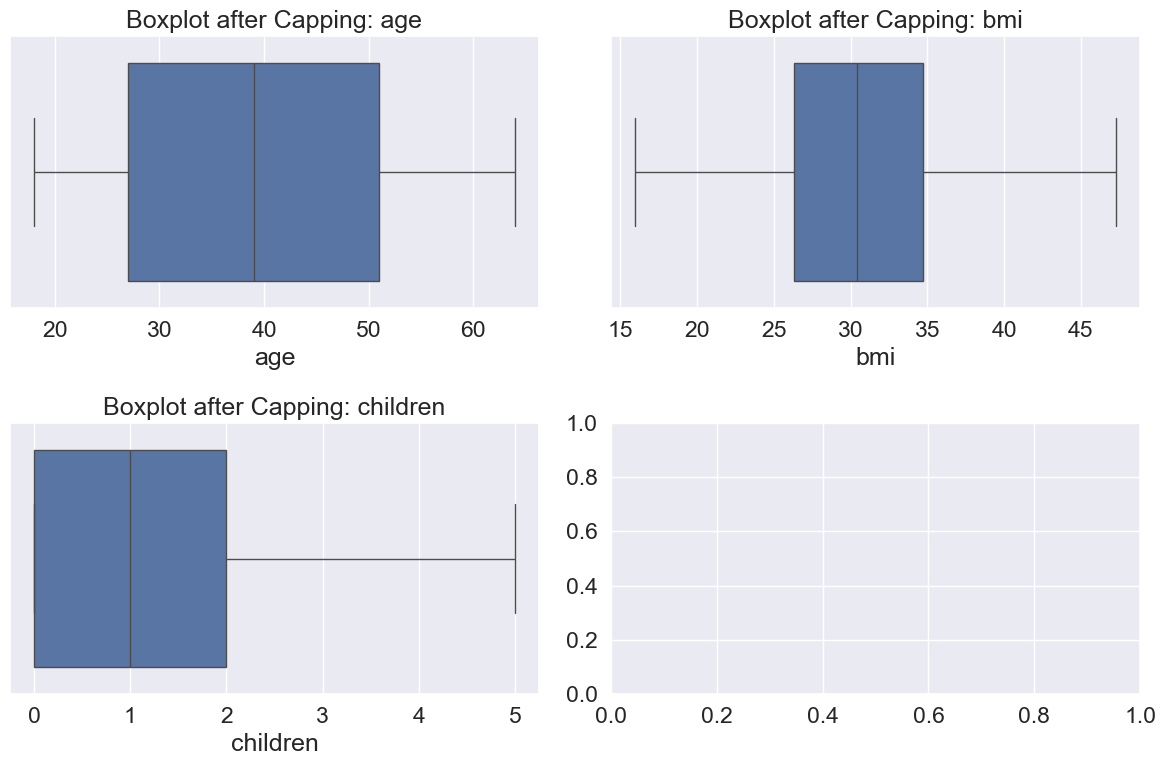

In [28]:
# Replot boxplots to visually confirm outliers are treated
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_capped, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot after Capping: {col}')

plt.tight_layout()
plt.show()


# Clearly there is no outlier after treating them. Now we will proceed by checking the Skewness 

# 4. Feature Engineering & Preprocessing

In [29]:
categorical_data = df.select_dtypes(include = ["object"])
categorical_data.head(5)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


### •	Encode categorical variables (sex, smoker, region)

In [30]:
# One-hot encode 'sex', 'smoker', and 'region'

df_cat_encoded = pd.get_dummies(categorical_data , columns = ["sex", "smoker", "region"], drop_first = True, dtype = int)
df_cat_encoded.head(5)

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


### •	Check for skewness and treat it if required.

In [31]:
# We are using df_capped because there is no outlier there. 

In [32]:
# Before transformation
skewness_before = df_capped[['age', 'bmi', 'children']].skew()
print("Skewness before transformation:")
print(skewness_before)

Skewness before transformation:
age         0.055673
bmi         0.232507
children    0.938380
dtype: float64


### From the above we can infer that skewness is very high in children so we will treat them

In [33]:
# Apply transformation
after_transformation = df_capped.copy()
after_transformation['children'] = np.log(after_transformation['children'] + 1)


In [34]:
# After transformation
skewness_after = after_transformation[['age', 'bmi', 'children']].skew()
print("\nSkewness after transformation:")
print(skewness_after)



Skewness after transformation:
age         0.055673
bmi         0.232507
children    0.264083
dtype: float64


In [35]:
# Combine transformed numerical data and one-hot encoded categorical data
df_final = pd.concat([after_transformation[['age', 'bmi', 'children']], df_cat_encoded], axis=1)

# Display the first 5 rows
df_final.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0.000000,0,1,0,0,1
1,18,33.770,0.693147,1,0,0,1,0
2,28,33.000,1.386294,1,0,0,1,0
3,33,22.705,0.000000,1,0,1,0,0
4,32,28.880,0.000000,1,0,1,0,0


## Since age and bmi are on a larger scale than the other variables (e.g., sex_male, children, etc.) it's a good idea to scale our features

In [36]:
scaler = StandardScaler()

# Columns to scale
columns_to_scale = ['age', 'bmi', 'children']

# Fit and transform
df_final[columns_to_scale] = scaler.fit_transform(df_final[columns_to_scale])

# Preview the scaled data
df_final.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.454201,-1.042346,0,1,0,0,1
1,-1.509965,0.515300,0.199594,1,0,0,1,0
2,-0.797954,0.388125,1.441534,1,0,0,1,0
3,-0.441948,-1.312218,-1.042346,1,0,1,0,0
4,-0.513149,-0.292342,-1.042346,1,0,1,0,0


# Adding the Charges column to the final Data Frame

In [37]:
# Add target variable to the final DataFrame
df_final['charges'] = df_capped['charges']
df_final.head(5)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.454201,-1.042346,0,1,0,0,1,16884.92400
1,-1.509965,0.515300,0.199594,1,0,0,1,0,1725.55230
2,-0.797954,0.388125,1.441534,1,0,0,1,0,4449.46200
3,-0.441948,-1.312218,-1.042346,1,0,1,0,0,21984.47061
4,-0.513149,-0.292342,-1.042346,1,0,1,0,0,3866.85520


### 5. Model Building: Try Multiple Regressors
### Use all the regression-based models to train and test the data:
### •	Linear Regression
### •	Decision Tree Regressor
### •	Random Forest Regressor
### •	SVR
### •	KNN
### •	Ensemble Learning methods

In [38]:
# Store performance metrices in the list

training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [39]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """

    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R2 score
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate the Adjusted R2 scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1-(1- train_r2/100) * (n_train - 1)/(n_train - p_train - 1))
    test_adj_r2 = 100 * (1-(1- test_r2/100) *  (n_test -1)/(n_train - p_train - 1))

    # Calculate RMSE score
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data R2 = {train_r2: .2f}%, Adjusted_r2 = {train_adj_r2:.2f}%, RMSE = {train_rmse: 4f}")
    print(f"Testing Data R2 = {test_r2:2f}%, Adjusted_r2 = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")   

In [40]:
# Define features and target

x = df_final.drop('charges', axis = 1)
y = df_final['charges']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)


In [41]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (1070, 8)
y_train - >   (1070,)
x_test  - >   (268, 8)
y_test  - >   (268,)


# Linear Regression

### Simple Linear Regression

In [42]:
evaluate_model_performance(
    model = LinearRegression(),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)

LinearRegression Performance Metrics:
Training Data R2 =  74.58%, Adjusted_r2 = 74.39%, RMSE =  6180.073496
Testing Data R2 = 77.098686%, Adjusted_r2 = 94.24%, RMSE = 5464.1997



## Ridge Regression

In [43]:
evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data R2 =  74.58%, Adjusted_r2 = 74.39%, RMSE =  6180.325348
Testing Data R2 = 77.099765%, Adjusted_r2 = 94.24%, RMSE = 5464.0710



## Lasso Regression

In [44]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data R2 =  74.58%, Adjusted_r2 = 74.39%, RMSE =  6180.073548
Testing Data R2 = 77.099075%, Adjusted_r2 = 94.24%, RMSE = 5464.1533



## Elastic Net

In [45]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data R2 =  71.11%, Adjusted_r2 = 70.89%, RMSE =  6588.357673
Testing Data R2 = 73.289932%, Adjusted_r2 = 93.28%, RMSE = 5901.1121



# DecisionTree Regression

In [46]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data R2 =  99.84%, Adjusted_r2 = 99.84%, RMSE =  494.205984
Testing Data R2 = 71.614288%, Adjusted_r2 = 92.86%, RMSE = 6083.3984



# Random Forest 

In [47]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data R2 =  97.46%, Adjusted_r2 = 97.44%, RMSE =  1953.832814
Testing Data R2 = 84.720052%, Adjusted_r2 = 96.15%, RMSE = 4463.3126



# SVR(Support vector Regressor)

In [48]:
from sklearn.svm import SVR

In [49]:
evaluate_model_performance(
    model=SVR(kernel='rbf'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

SVR Performance Metrics:
Training Data R2 = -9.56%, Adjusted_r2 = -10.39%, RMSE =  12830.104510
Testing Data R2 = -4.580713%, Adjusted_r2 = 73.68%, RMSE = 11676.7548



# KNN (Kth Nearest Neighbour)

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data R2 =  80.28%, Adjusted_r2 = 80.14%, RMSE =  5442.498194
Testing Data R2 = 71.392707%, Adjusted_r2 = 92.80%, RMSE = 6107.0959



# Ensemble Learning Methods

## Voting Regressor

In [52]:
# Define the base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators = 100, random_state = 42)
model3 = KNeighborsRegressor()

In [53]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators = [('lr', model1), ('rf', model2), ('knn', model3)])

In [54]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data R2 =  89.06%, Adjusted_r2 = 88.98%, RMSE =  4054.325880
Testing Data R2 = 84.723888%, Adjusted_r2 = 96.16%, RMSE = 4462.7523



## Bagging Regressor

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [56]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)

In [57]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

In [58]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data R2 =  92.49%, Adjusted_r2 = 92.43%, RMSE =  3359.024089
Testing Data R2 = 73.185755%, Adjusted_r2 = 93.25%, RMSE = 5912.6088



# Ada Boosting

In [59]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data R2 =  82.69%, Adjusted_r2 = 82.56%, RMSE =  5099.628863
Testing Data R2 = 81.776109%, Adjusted_r2 = 95.41%, RMSE = 4874.3524



# GradientBoosting Regression

In [60]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data R2 =  90.10%, Adjusted_r2 = 90.03%, RMSE =  3855.796765
Testing Data R2 = 87.588759%, Adjusted_r2 = 96.88%, RMSE = 4022.5732



# XGB Regression

In [61]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data R2 =  99.54%, Adjusted_r2 = 99.54%, RMSE =  830.963693
Testing Data R2 = 81.135719%, Adjusted_r2 = 95.25%, RMSE = 4959.2555



# CatBoost Regression

In [62]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data R2 =  95.40%, Adjusted_r2 = 95.37%, RMSE =  2628.092896
Testing Data R2 = 86.174576%, Adjusted_r2 = 96.52%, RMSE = 4245.5660



In [63]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "SVR",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Ada Boost",
    "Gradient Boost",
    "XGBoost",
    "CatBoost",
    ]

In [64]:
# Ensure all metric lists match the length of the models list
models = models[:14]  # or len(training_scores_r2) if you want to match the metrics

training_scores_r2 = training_scores_r2[:len(models)]
training_scores_adj_r2 = training_scores_adj_r2[:len(models)]
training_scores_rmse = training_scores_rmse[:len(models)]
testing_scores_r2 = testing_scores_r2[:len(models)]
testing_scores_adj_r2 = testing_scores_adj_r2[:len(models)]
testing_scores_rmse = testing_scores_rmse[:len(models)]

# Now create the DataFrame
df_model = pd.DataFrame({
    "Algorithms": models,
    "Training Score R2": training_scores_r2,
    "Training Score Adjusted R2": training_scores_adj_r2,
    "Training Score RMSE": training_scores_rmse,
    "Testing Score R2": testing_scores_r2,
    "Testing Score Adjusted R2": testing_scores_adj_r2,
    "Testing Score RMSE": testing_scores_rmse,
})

# Sort by Testing Score R2
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort


,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
11,Gradient Boost,90.104639,90.030028,3855.796765,87.588759,96.876719,4022.573225
13,CatBoost,95.402891,95.368229,2628.092896,86.174576,96.520840,4245.566027
8,Voting Regressor,89.059412,88.976919,4054.325880,84.723888,96.155776,4462.752263
5,Random Forest,97.459155,97.439997,1953.832814,84.720052,96.154810,4463.312599
10,Ada Boost,82.690660,82.560147,5099.628863,81.776109,95.413969,4874.352357
12,XGBoost,99.540413,99.536948,830.963693,81.135719,95.252815,4959.255529
1,Ridge,74.577044,74.385354,6180.325348,77.099765,94.237170,5464.070992
2,Lasso,74.579116,74.387441,6180.073548,77.099075,94.236996,5464.153261
0,Linear Regression,74.579116,74.387441,6180.073496,77.098686,94.236898,5464.199739
3,ElasticNet,71.109324,70.891487,6588.357673,73.289932,93.278428,5901.112073


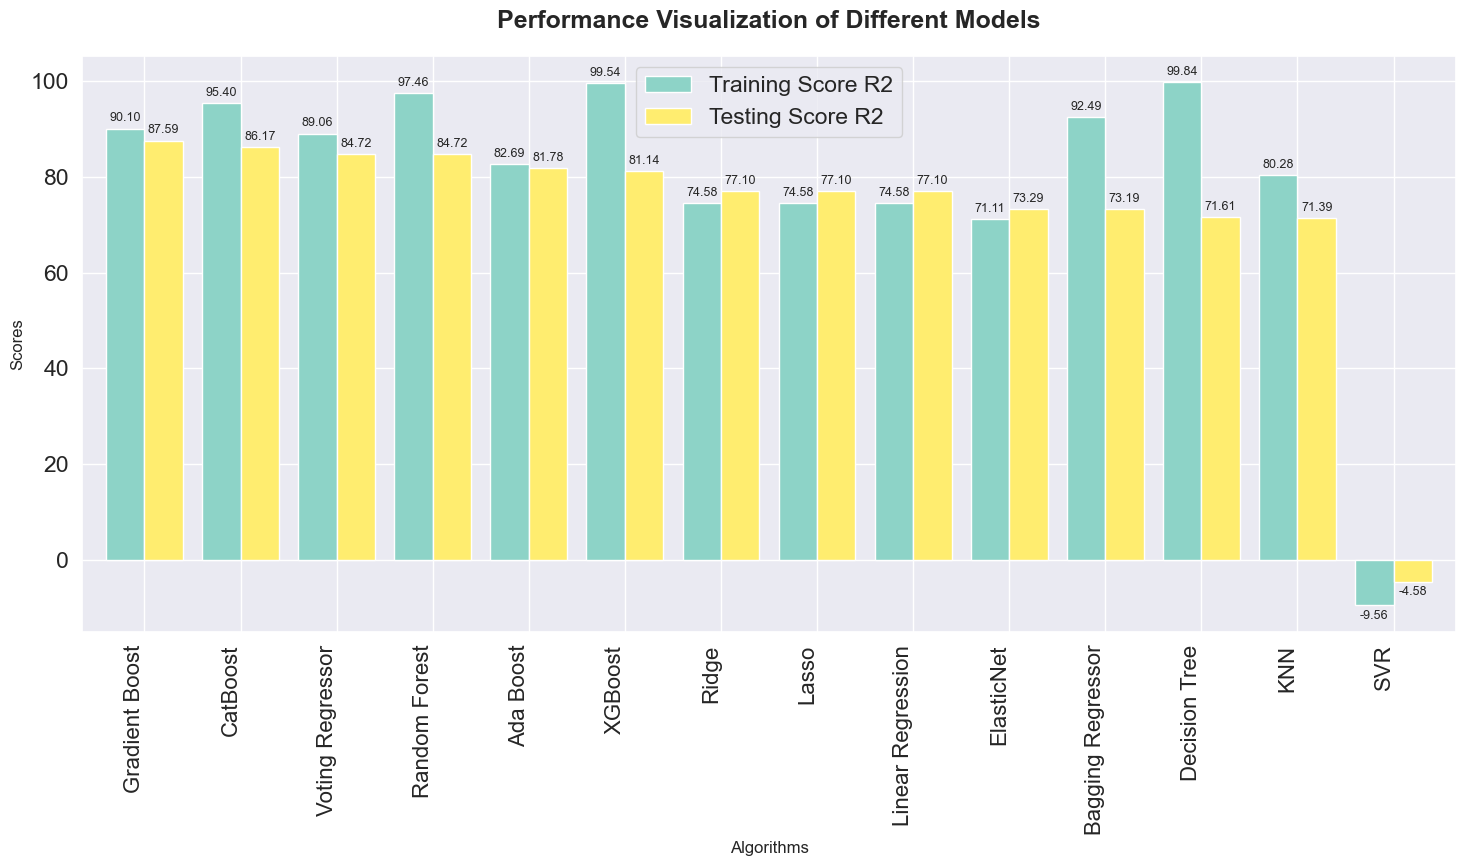

In [65]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

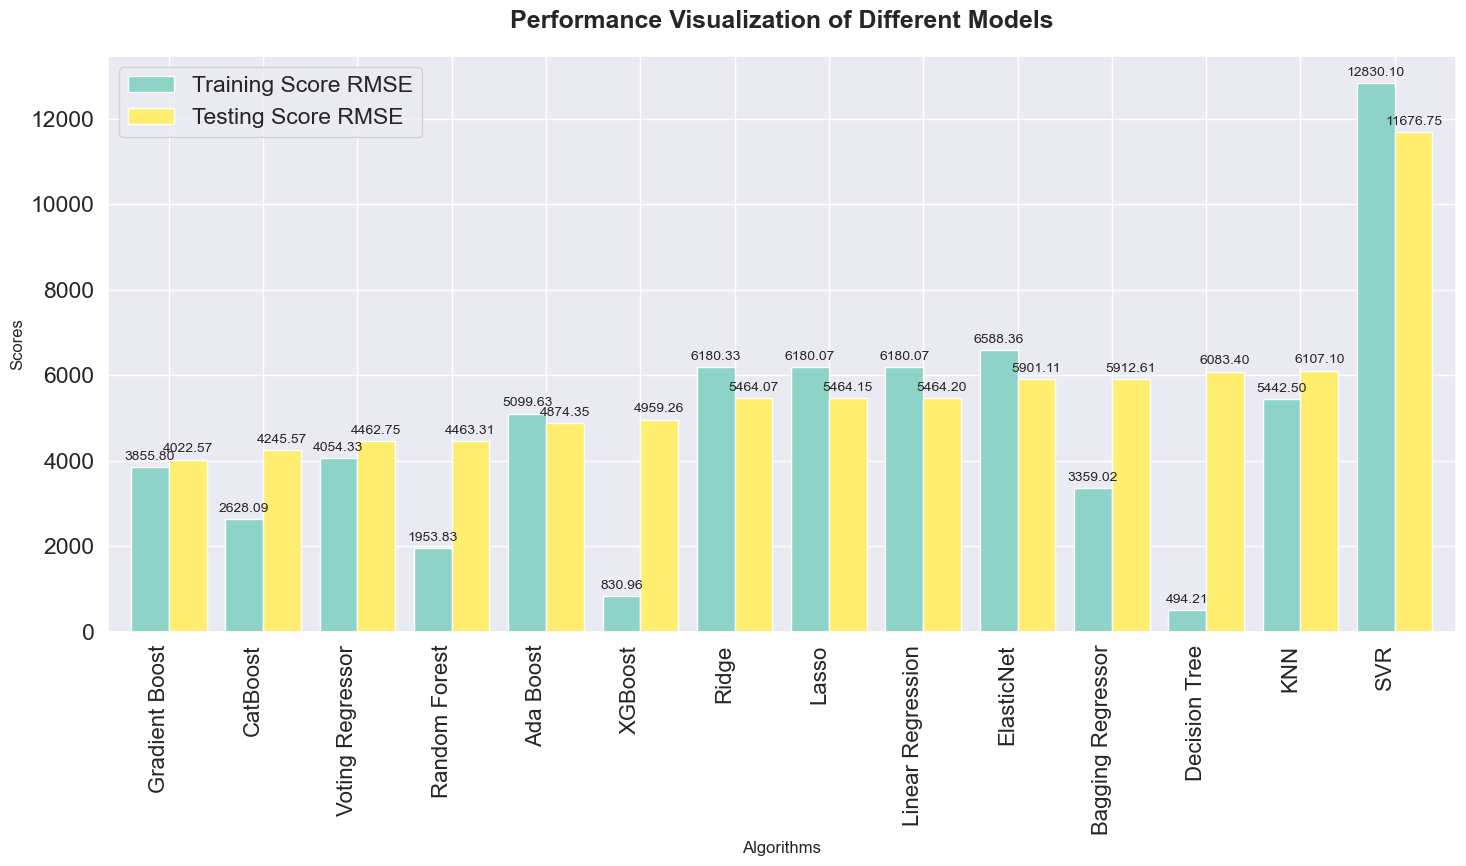

In [66]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

# Using Hyper Parameter Tuning

In [67]:
# Define features and target

x = df_final.drop('charges', axis = 1)
y = df_final['charges']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)


In [68]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (1070, 8)
y_train - >   (1070,)
x_test  - >   (268, 8)
y_test  - >   (268,)


In [69]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [70]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test,score_append = False):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    if score_append == True:
        # Append scores to respective lists
        training_scores_r2.append(train_r2)
        training_scores_adj_r2.append(train_adj_r2)
        training_scores_rmse.append(train_rmse)
        testing_scores_r2.append(test_r2)
        testing_scores_adj_r2.append(test_adj_r2) 
        testing_scores_rmse.append(test_rmse) 
    else:
        pass
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

## Linear Regression

In [71]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

LinearRegression Performance Metrics:
Training Data: R² = 74.58%, Adjusted R² = 74.39%, RMSE = 6180.0735
Testing Data : R² = 77.10%, Adjusted R² = 76.39%, RMSE = 5464.1997



## Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize the Ridge regression model
ridge = Ridge()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],           # Regularization strength
    'fit_intercept': [True, False],                   # Include or exclude the intercept
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],  # Solver options
    'tol': [1e-4, 1e-3, 1e-2],                        # Tolerance for convergence
    'positive': [True, False]                         # Constrain coefficients to be positive
}
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    cv=5,                              # Number of cross-validation folds
    verbose=2,                         # Verbosity level
    n_jobs=-1                          # Use all available cores for parallel processing
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'positive': False, 'solver': 'saga', 'tol': 0.01}
Best score (negative MSE): -39026045.43539494
Test MSE: 30080007.021548007


## Best Parameter

In [73]:
# Create the Ridge Regression model
ridge_regressor = Ridge(
    alpha=1,                   # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    tol=0.01,                  # Tolerance for stopping criteria
    solver='saga',              # Solver to use ('auto', 'lsqr', 'saga', etc.)
    positive=False,
    random_state=15,           # Random state for reproducibility
)

In [74]:
evaluate_model_performance(
    model=ridge_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

Ridge Performance Metrics:
Training Data: R² = 74.57%, Adjusted R² = 74.38%, RMSE = 6180.8833
Testing Data : R² = 77.19%, Adjusted R² = 76.49%, RMSE = 5452.8815



# Lasso Regression

In [75]:
# Initialize the Ridge regression model
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 2000],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    cv=5,                              # Number of cross-validation folds
    verbose=2,                         # Verbosity level
    n_jobs=-1                          # Use all available cores for parallel processing
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'alpha': 10, 'max_iter': 2000, 'selection': 'random', 'tol': 0.001}
Best score (negative MSE): -39044452.64707507
Test MSE: 29812540.912938405


## Best Parameter

In [76]:
# Create the Lasso Regression model
lasso_regressor = Lasso(
    alpha=10,                 # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.01,                 # Tolerance for stopping criteria
    selection='random',
    random_state=15,            # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [77]:
evaluate_model_performance(
    model=lasso_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

Lasso Performance Metrics:
Training Data: R² = 74.57%, Adjusted R² = 74.38%, RMSE = 6180.6843
Testing Data : R² = 77.13%, Adjusted R² = 76.43%, RMSE = 5460.1041



# Elastic Net

In [78]:
# Define the model
elastic_net = ElasticNet()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'max_iter': [100, 200, 500],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}
# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=elastic_net, 
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=2,
    n_jobs=-1)
# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
Best parameters: {'alpha': 10, 'l1_ratio': 1.0, 'max_iter': 200, 'selection': 'random', 'tol': 0.01}
Best score (negative MSE): -39047821.34050298
Test MSE: 29812772.05022811


## Best Parameter

In [79]:
# Create the ElasticNet Regression model
elasticnet_regressor = ElasticNet(
    alpha=10,                  # Regularization strength
    l1_ratio=1,               # The balance between Lasso (L1) and Ridge (L2) regularization (0 is Ridge, 1 is Lasso)
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    selection= 'random',
    max_iter=100,              # Maximum number of iterations for the solver
    tol=0.001,                 # Tolerance for stopping criteria
    random_state=15,          # Random state for reproducibility
)

In [80]:
evaluate_model_performance(
    model=elasticnet_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

ElasticNet Performance Metrics:
Training Data: R² = 74.57%, Adjusted R² = 74.38%, RMSE = 6180.5998
Testing Data : R² = 77.13%, Adjusted R² = 76.43%, RMSE = 5460.1024



# Decision Tree Regressor

In [81]:
# Define the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 50],
    'ccp_alpha': [0.01, 0.1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree, 
    param_grid=param_grid,      
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=2,
    n_jobs=-1)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
Test RMSE: 3879.89949178864


# Best Parameter

In [82]:
# Create the DecisionTree Regressor model
decision_tree_regressor = DecisionTreeRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    splitter='best',              # Strategy used to split at each node
    max_depth=5,                 # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=10,           # Minimum number of samples required to be at a leaf node
    max_features=None,            # The number of features to consider when looking for the best split
    random_state=15,              # Controls the randomness for reproducibility
    max_leaf_nodes=20,            # Grow a tree with a maximum number of leaf nodes
    ccp_alpha=0.01
)

In [83]:
evaluate_model_performance(
    model=decision_tree_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 86.95%, Adjusted R² = 86.85%, RMSE = 4428.4035
Testing Data : R² = 88.45%, Adjusted R² = 88.10%, RMSE = 3879.8995



# Random Forest Regressor

In [84]:
# Initialize the model
random_forest_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees
    'max_depth': [None, 5, 10, 15],       # Tree depth
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],        # Minimum samples at a leaf
    'max_features': ['sqrt', 'log2'],     # Features considered for best split
}


# Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for mean squared error
    cv=3,                             # 3-fold cross-validation
    verbose=2,                        # Print detailed logs
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Test MSE: 15505215.68


# Best Parameter

In [85]:
# Create the RandomForest Regressor model
random_forest_regressor = RandomForestRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    n_estimators=150,             # Number of trees in the forest
    max_depth=10,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=2,           # Minimum number of samples required to be at a leaf node
    max_features='log2',          # Use square root of features for the best split
    random_state=15,              # Controls the randomness for reproducibility
    n_jobs=-1,                    # Use all available cores for parallel processing
    max_samples=None,             # If bootstrap=True, the number of samples to draw from X to train each base estimator
)

In [86]:
evaluate_model_performance(
    model=random_forest_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 92.54%, Adjusted R² = 92.48%, RMSE = 3348.3576
Testing Data : R² = 88.18%, Adjusted R² = 87.81%, RMSE = 3925.6321



# Support Vector Regressor

In [87]:
# Initialize the model
svr_model = SVR()

# Define the parameter grid
param_grid = {
    'kernel': ['rbf', 'linear'],             # Kernel type
    'C': [0.1, 1, 10],                       # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5],              # Epsilon in the epsilon-SVR model
    'gamma': ['scale', 'auto']              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
}

# Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for mean squared error
    cv=3,                              # 3-fold cross-validation
    verbose=2,                         # Print detailed logs
    n_jobs=-1                          # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test MSE: 125256843.32


# Best Parameter

In [88]:
# Create the SVR model with best-found hyperparameters
svr_best = SVR(
    kernel='linear',
    C=10,
    epsilon=0.1,
    gamma='scale'
    
)

In [89]:
# Custom evaluation function call
evaluate_model_performance(
    model=svr_best,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append=True
)

SVR Performance Metrics:
Training Data: R² = -1.23%, Adjusted R² = -1.99%, RMSE = 12332.4013
Testing Data : R² = 3.93%, Adjusted R² = 0.96%, RMSE = 11191.8204



# KNearest Neighbour

In [90]:
# Define the KNN regressor
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),                 # Number of neighbors
    'weights': ['uniform', 'distance'],          # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2, 3]                              # Power parameter for Minkowski
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Test MSE: 29713705.71


# Best Parameter

In [91]:
# Create the KNeighbors Regressor model
knn_regressor = KNeighborsRegressor(
    n_neighbors=7,               # Number of neighbors to use
    weights='distance',           # Weight function: 'uniform' or 'distance'
    metric='manhattan',          # The distance metric: 'minkowski', 'euclidean', etc.
    p=1,                         # Power parameter for the Minkowski metric (2 for Euclidean distance)
    n_jobs=-1                    # Use all available cores for parallel processing
)


In [92]:
evaluate_model_performance(
    model=knn_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 99.84%, Adjusted R² = 99.84%, RMSE = 494.2060
Testing Data : R² = 77.21%, Adjusted R² = 76.50%, RMSE = 5451.0279



# Ensemble Learning methods

# Voting Regressor

In [93]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(
        criterion='squared_error',    
        n_estimators=50,              
        max_depth=None,              
        min_samples_split=2,          
        min_samples_leaf=1,          
        max_features='log2',         
        random_state=15,              
        n_jobs=-1,                    
        max_samples=None,    
        )
model3 = KNeighborsRegressor(
        n_neighbors=2,             
        weights='distance',         
        metric='manhattan',
        p=1,                  
        n_jobs=-1         
        )

In [94]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [95]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

VotingRegressor Performance Metrics:
Training Data: R² = 95.55%, Adjusted R² = 95.51%, RMSE = 2586.8860
Testing Data : R² = 85.87%, Adjusted R² = 85.43%, RMSE = 4292.7851



# Bagging Regressor

In [96]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    splitter='best',              # Strategy used to split at each node
    max_depth=10,                 # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features=None,            # The number of features to consider when looking for the best split
    random_state=15,              # Controls the randomness for reproducibility
    max_leaf_nodes=50,            # Grow a tree with a maximum number of leaf nodes
    ccp_alpha=0.01
    )

In [97]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor, # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=15,
    n_jobs=-1                 # Use all available cores
)

In [98]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

BaggingRegressor Performance Metrics:
Training Data: R² = 83.09%, Adjusted R² = 82.97%, RMSE = 5040.0450
Testing Data : R² = 74.62%, Adjusted R² = 73.84%, RMSE = 5752.3437



# Ada Boosting

In [99]:
# Define base estimator
base_estimator = DecisionTreeRegressor()

# Define AdaBoost model
adaboost_regressor = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],             # Number of boosting rounds
    'learning_rate': [0.1, 0.5, 1.0],          # Learning rate
    'estimator__max_depth': [1, 2, 3],         # Depth of the weak learner
    'estimator__min_samples_split': [2, 5, 10]  # Minimum samples to split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    cv=3,                             # 3-fold cross-validation
    verbose=2,                        # Log progress
    n_jobs=-1                         # Use all cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'estimator__max_depth': 3, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 50}
Test MSE: 20530047.21


# Best Parameter

In [100]:
# Define the base estimator with its parameters
base_estimator = DecisionTreeRegressor(max_depth=3,min_samples_split=10)

# Create the AdaBoost Regressor model
adaboost_regressor = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=0.1,
    random_state=15
)

In [101]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 80.59%, Adjusted R² = 80.44%, RMSE = 5400.4231
Testing Data : R² = 79.48%, Adjusted R² = 78.84%, RMSE = 5172.8502



# GradientBoosting Regression

In [102]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
Test MSE: 14609379.21


# Best Parameter

In [103]:
# Create the Gradinet Boost Regressor model
gradient_boosting_regressor = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=50,
    min_samples_split=10,
    random_state=15
)

In [104]:
evaluate_model_performance(
    model=gradient_boosting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 88.12%, Adjusted R² = 88.03%, RMSE = 4225.1192
Testing Data : R² = 88.79%, Adjusted R² = 88.45%, RMSE = 3822.2218



# XGB Regression

In [105]:
# Define the XGBoost model
xgb = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.1, 1.0],
    'reg_lambda': [1.0, 2.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.8}
Test MSE: 14658631.90


# Best Parameter

In [106]:
from xgboost import XGBRegressor

xgb_boosting_regressor = XGBRegressor(
    colsample_bytree=1.0,
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=3,
    n_estimators=50,
    reg_alpha=1.0,
    reg_lambda=1.0,
    subsample=0.8,
    random_state=15
)


In [107]:
evaluate_model_performance(
    model=xgb_boosting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

XGBRegressor Performance Metrics:
Training Data: R² = 87.88%, Adjusted R² = 87.79%, RMSE = 4266.8963
Testing Data : R² = 88.73%, Adjusted R² = 88.38%, RMSE = 3833.9289



# CatBoost Regression

In [ ]:
# Define the CatBoost model
catboost = CatBoostRegressor(
    verbose=0,  # Suppress training logs for clarity
    random_state=42
)

# Define the parameter grid
param_grid = {
    'iterations': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 1, 3],
    'colsample_bylevel': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


# Best Parameter

In [110]:
# Create the AdaBoost Regressor model
cat_boosting_regressor = CatBoostRegressor(
    bagging_temperature=0,
    colsample_bylevel=0.8,
    depth=4,
    iterations=100,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_state=15
)

In [111]:
evaluate_model_performance(
    model=cat_boosting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

0:	learn: 11332.3646480	total: 564us	remaining: 55.9ms
1:	learn: 10531.4501429	total: 1.28ms	remaining: 62.9ms
2:	learn: 9846.4868763	total: 1.81ms	remaining: 58.4ms
3:	learn: 9212.4381852	total: 2.27ms	remaining: 54.5ms
4:	learn: 8617.7614993	total: 2.76ms	remaining: 52.5ms
5:	learn: 8106.5777370	total: 3.23ms	remaining: 50.6ms
6:	learn: 7641.7163832	total: 3.71ms	remaining: 49.3ms
7:	learn: 7240.9021888	total: 4.16ms	remaining: 47.8ms
8:	learn: 6877.8499675	total: 4.64ms	remaining: 46.9ms
9:	learn: 6592.2886079	total: 5.17ms	remaining: 46.5ms
10:	learn: 6334.5857363	total: 5.66ms	remaining: 45.8ms
11:	learn: 6104.5438724	total: 6.13ms	remaining: 45ms
12:	learn: 5888.8673177	total: 6.55ms	remaining: 43.8ms
13:	learn: 5719.4494567	total: 6.97ms	remaining: 42.8ms
14:	learn: 5569.2471168	total: 7.43ms	remaining: 42.1ms
15:	learn: 5455.9743287	total: 7.89ms	remaining: 41.4ms
16:	learn: 5351.1291676	total: 8.37ms	remaining: 40.9ms
17:	learn: 5283.8203486	total: 8.69ms	remaining: 39.6ms
18:

In [112]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "SVR",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Ada Boost",
    "Gradient Boost",
    "XGBoost",
    "CatBoost",
    ]

In [113]:
# Ensure all metric lists match the length of the models list
models = models[:14]  # or len(training_scores_r2) if you want to match the metrics

training_scores_r2 = training_scores_r2[:len(models)]
training_scores_adj_r2 = training_scores_adj_r2[:len(models)]
training_scores_rmse = training_scores_rmse[:len(models)]
testing_scores_r2 = testing_scores_r2[:len(models)]
testing_scores_adj_r2 = testing_scores_adj_r2[:len(models)]
testing_scores_rmse = testing_scores_rmse[:len(models)]

# Now create the DataFrame
df_model = pd.DataFrame({
    "Algorithms": models,
    "Training Score R2": training_scores_r2,
    "Training Score Adjusted R2": training_scores_adj_r2,
    "Training Score RMSE": training_scores_rmse,
    "Testing Score R2": testing_scores_r2,
    "Testing Score Adjusted R2": testing_scores_adj_r2,
    "Testing Score RMSE": testing_scores_rmse,
})

# Sort by Testing Score R2
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
12,Voting Regressor,88.118226,88.028637,4225.119163,88.794299,88.448177,3822.221764
13,Bagging Regressor,87.882095,87.790726,4266.896259,88.725549,88.377304,3833.928943
4,Decision Tree,86.947379,86.848961,4428.403530,88.453557,88.096910,3879.899492
5,Random Forest,92.537798,92.481532,3348.357583,88.179755,87.814651,3925.632127
6,SVRAda Boost,92.537798,92.481532,3348.357583,88.179755,87.814651,3925.632127
9,XGBoost,95.545921,95.512337,2586.886012,85.865334,85.428742,4292.785055
11,KNN,83.020499,82.892472,5050.807097,83.467916,82.957273,4642.588184
8,LGBM,99.837438,99.836212,494.205984,77.208963,76.504992,5451.027950
1,Ridge,74.572454,74.380729,6180.883291,77.193461,76.489012,5452.881453
3,ElasticNet,74.574786,74.383078,6180.599842,77.133018,76.426702,5460.102383


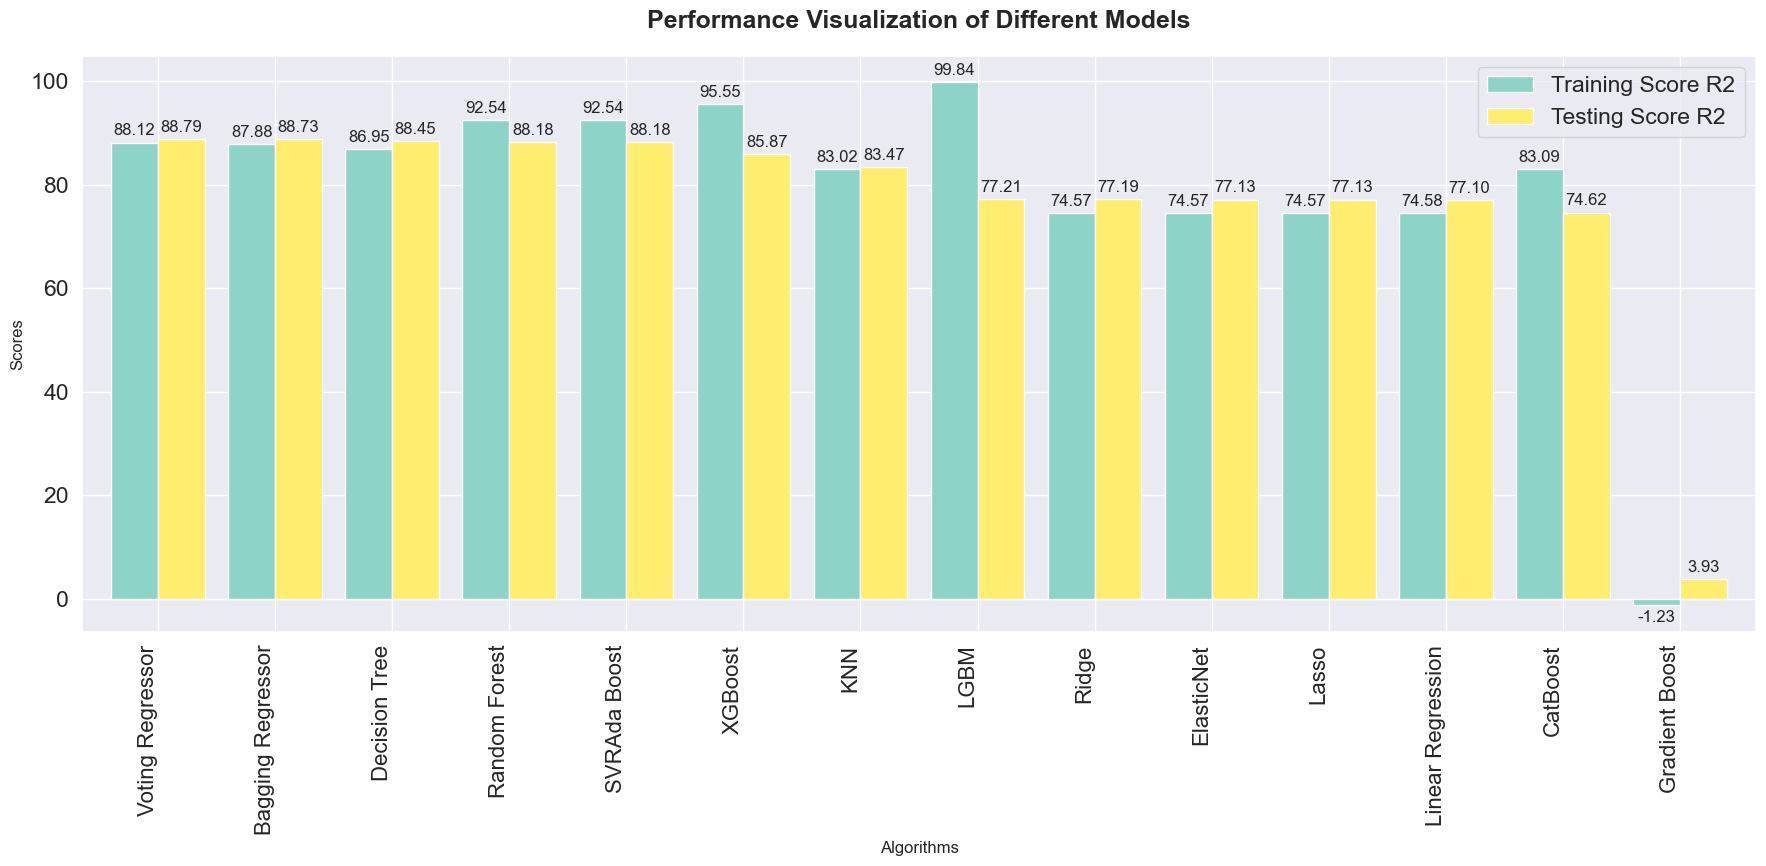

In [114]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, padding=3)

plt.tight_layout()
plt.show()

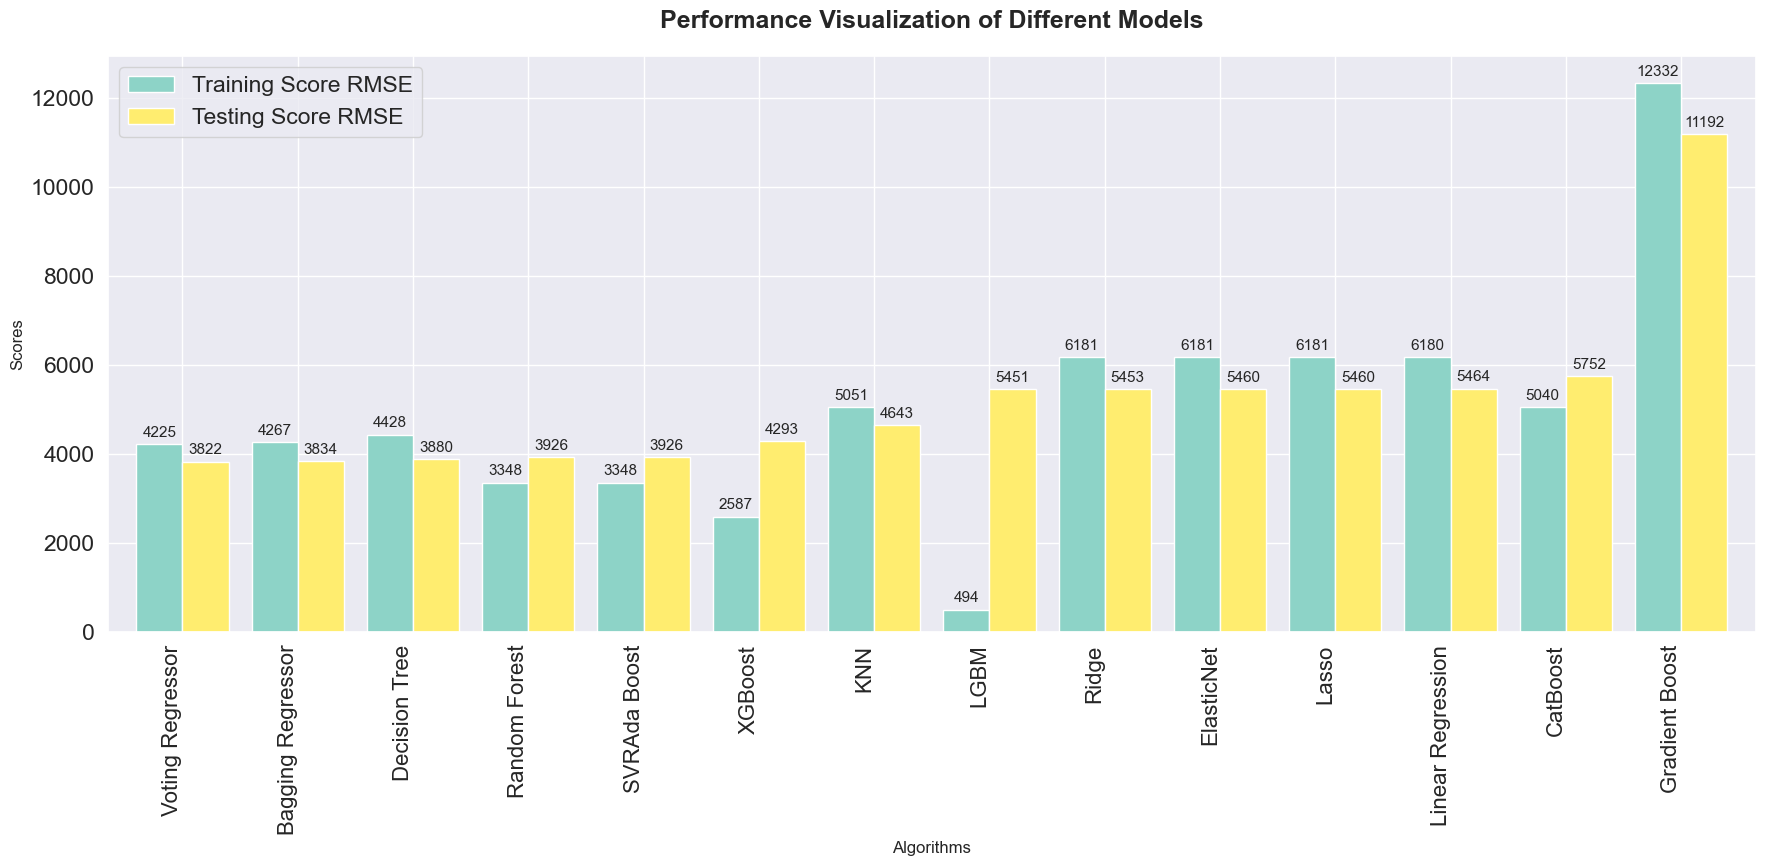

In [115]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()


### After looking at the plots we should go with the Ada Boost
### Considering all the parameters from the above two graphs.

### Although Random Forest and Ada Boost are equal still. So we can use any one. 

### We will choose Ada Boost because of its better results

In [116]:
# Best parameters: {'estimator__max_depth': 3, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 50}

# Define the base estimator with its parameters
base_estimator = DecisionTreeRegressor(max_depth=3,min_samples_split=10)

# Create the AdaBoost Regressor model
adaboost_regressor = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=0.1,
    random_state=15
)

# Fit the model
adaboost_regressor.fit(x_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3,
                                                  min_samples_split=10),
                  learning_rate=0.1, random_state=15)

# Saving a Trained Ada Boosting Regressor Model using joblib

In [118]:
import joblib

joblib.dump(adaboost_regressor, "adaboost_model.pkl")


['adaboost_model.pkl']

# Deploying Ada Boosting Regressor Model for insurance prediction with Streamlit

In [129]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load trained AdaBoost model
model = joblib.load("adaboost_model.pkl")

# Streamlit UI
st.title(" Insurance Cost Prediction using AdaBoost Regressor")
st.write("Provide the user details below to predict insurance charges.")

# Input fields
age = st.slider("Age", 18, 65, 30)
sex = st.selectbox("Sex", ["male", "female"])
bmi = st.slider("BMI", 10.0, 50.0, 25.0)
children = st.selectbox("Number of Children", [0, 1, 2, 3, 4, 5])
smoker = st.selectbox("Smoker", ["yes", "no"])
region = st.selectbox("Region", ["northeast", "northwest", "southeast", "southwest"])

# Encode the inputs like training data
data = {
    'age': age,
    'bmi': bmi,
    'children': children,
    'sex_male': 1 if sex == 'male' else 0,
    'smoker_yes': 1 if smoker == 'yes' else 0,
    'region_northwest': 1 if region == 'northwest' else 0,
    'region_southeast': 1 if region == 'southeast' else 0,
    'region_southwest': 1 if region == 'southwest' else 0
}

input_df = pd.DataFrame([data])

# Prediction
if st.button("Predict Insurance Charges"):
    prediction = model.predict(input_df)[0]
    st.success(f"Predicted Insurance Charges: ₹{prediction:.2f}")


In [131]:
with open("app.py", "w", encoding="utf-8") as f:
    f.write("""
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load trained AdaBoost model
model = joblib.load("adaboost_model.pkl")

# Streamlit UI
st.title("Insurance Cost Prediction using AdaBoost Regressor")
st.write("Provide the user details below to predict insurance charges.")

# Input fields
age = st.slider("Age", 18, 65, 30)
sex = st.selectbox("Sex", ["male", "female"])
bmi = st.slider("BMI", 10.0, 50.0, 25.0)
children = st.selectbox("Number of Children", [0, 1, 2, 3, 4, 5])
smoker = st.selectbox("Smoker", ["yes", "no"])
region = st.selectbox("Region", ["northeast", "northwest", "southeast", "southwest"])

# Encode the inputs like training data
data = {
    'age': age,
    'bmi': bmi,
    'children': children,
    'sex_male': 1 if sex == 'male' else 0,
    'smoker_yes': 1 if smoker == 'yes' else 0,
    'region_northwest': 1 if region == 'northwest' else 0,
    'region_southeast': 1 if region == 'southeast' else 0,
    'region_southwest': 1 if region == 'southwest' else 0
}

input_df = pd.DataFrame([data])

# Prediction
if st.button("Predict Insurance Charges"):
    prediction = model.predict(input_df)[0]
    st.success(f"Predicted Insurance Charges: ₹{prediction:.2f}")
""")


In [ ]:
# In command prompt first type(admin rights not necessary)
Step 1 -> Type D:
Step 2 Then type -> cd "Data_science\Supervised Machine Learning\Mini Project"
Step 3 -> pip install streamlit # install it in the command prompt

Step 4 -> python -m pip install --upgrade pip      # incase any upgradation is suggested
Step 5 -> pip install scikit-learn     # inside the D folder where I have data_science folder
Step 6 -> Then run this  ->  streamlit run app.py   #final step 

